### Parte 1 - Import

In [41]:
import pandas as pd

dtf = pd.read_excel("dataset.xlsx")
dtf.head(3)

,Id,Strada,Qualita,Anno,Ristrutturata,Seminterrato,AC,MQ,Stanze,Camino,Garage,Prezzo
0,1,65.0,7,2003,2003,856,Y,153,8,0,2,208500
1,2,80.0,6,1976,1976,1262,Y,113,6,1,2,181500
2,3,68.0,7,2001,2002,920,Y,160,6,1,2,223500


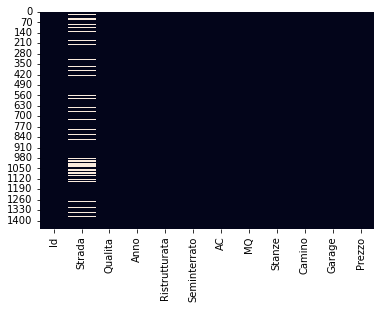

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dtf.isna(), cbar=False)
plt.show()

### Parte 2 - EDA

In [43]:
dtf["Id"].nunique() == len(dtf)

True

In [44]:
dtf = dtf.set_index("Id").rename(columns={"Prezzo":"Y"})
dtf.head(3)

,Strada,Qualita,Anno,Ristrutturata,Seminterrato,AC,MQ,Stanze,Camino,Garage,Y
Id,,,,,,,,,,,
1,65.0,7,2003,2003,856,Y,153,8,0,2,208500
2,80.0,6,1976,1976,1262,Y,113,6,1,2,181500
3,68.0,7,2001,2002,920,Y,160,6,1,2,223500


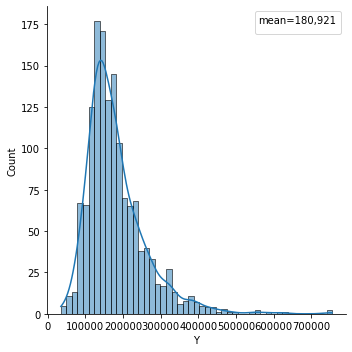

In [45]:
sns.displot(data=dtf, x="Y", kde=True)
plt.legend(title="mean={:,.0f}".format(dtf["Y"].mean()), labels=[])
plt.show()

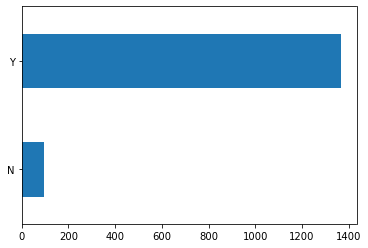

In [46]:
dtf["AC"].value_counts().sort_values().plot(kind="barh")
plt.show()

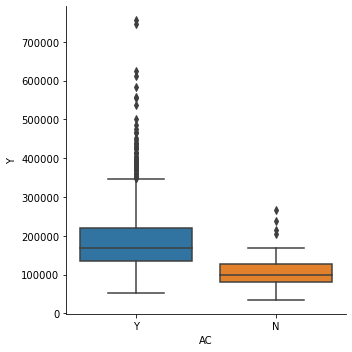

In [47]:
sns.catplot(data=dtf, x="AC", y="Y", kind="box")
plt.show()

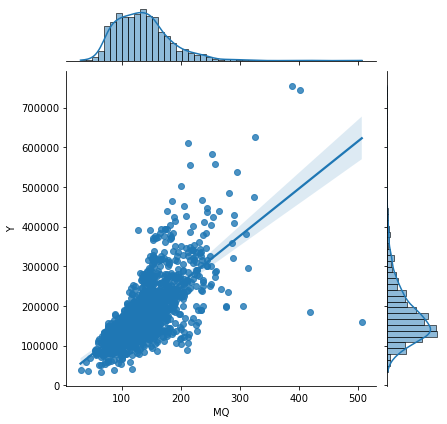

In [48]:
sns.jointplot(data=dtf, x="MQ", y="Y", kind='reg')
plt.show()

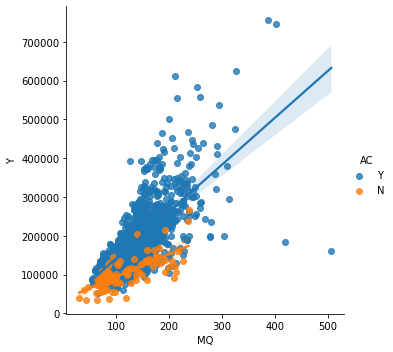

In [49]:
sns.lmplot(data=dtf, x="MQ", y="Y", hue="AC")
plt.show()

### Parte 3 - Missing Data

In [50]:
tmp = dtf[["Strada","Y"]]
tmp["X"] = tmp["Strada"].apply(lambda x: 
    "Value" if not pd.isna(x) else "NA")
tmp[["Strada","X"]].head(3)

,Strada,X
Id,,
1,65.0,Value
2,80.0,Value
3,68.0,Value


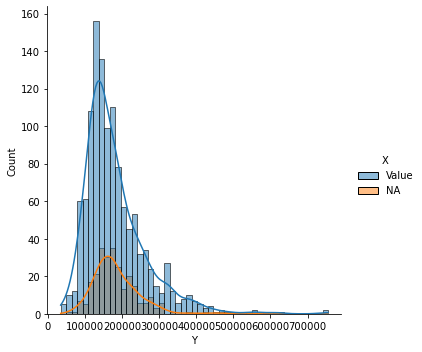

In [51]:
sns.displot(data=tmp, x="Y", hue="X", kde=True)
plt.show()

In [52]:
dtf["Strada"].mean()

70.04995836802665

In [53]:
dtf["Strada"].head( int(0.8*len(dtf)) ).mean()

69.94698544698545

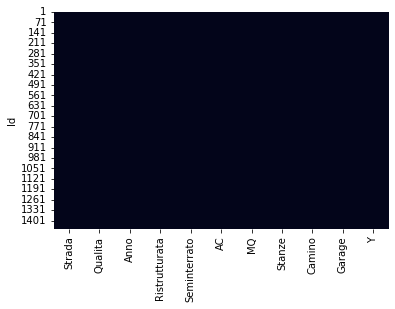

In [54]:
dtf["Strada"] = dtf["Strada"].fillna(69.9)

sns.heatmap(dtf.isna(), cbar=False)
plt.show()

### Parte 4 - Preprocessing

In [55]:
# Categorical Data
dtf_dummy = pd.get_dummies(dtf["AC"], prefix="AC", 
                           drop_first=True, 
                           dummy_na=False)
dtf = pd.concat([dtf_dummy, dtf], axis=1)
dtf = dtf.drop("AC", axis=1)
dtf.head()

,AC_Y,Strada,Qualita,Anno,Ristrutturata,Seminterrato,MQ,Stanze,Camino,Garage,Y
Id,,,,,,,,,,,
1,1,65.0,7,2003,2003,856,153,8,0,2,208500
2,1,80.0,6,1976,1976,1262,113,6,1,2,181500
3,1,68.0,7,2001,2002,920,160,6,1,2,223500
4,1,60.0,7,1915,1970,756,154,7,1,3,140000
5,1,84.0,8,2000,2000,1145,197,9,1,3,250000


In [57]:
# Partitioning
from sklearn import model_selection

dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      train_size=0.8, shuffle=False) 
print("Train -->", "len:", len(dtf_train), ", Y:", int(dtf_train["Y"].mean()))
print("Test  -->", "len:", len(dtf_test), ",  Y:", int(dtf_test["Y"].mean()))

Train --> len: 1168 , Y: 180590
Test  --> len: 292 ,  Y: 182244


In [58]:
# Scaling
from sklearn import preprocessing

scalerX = preprocessing.RobustScaler()
scalerY = preprocessing.RobustScaler()

In [59]:
X_names = dtf_train.drop("Y", axis=1).columns
X_names

Index(['AC_Y', 'Strada', 'Qualita', 'Anno', 'Ristrutturata', 'Seminterrato',
       'MQ', 'Stanze', 'Camino', 'Garage'],
      dtype='object')

In [60]:
dtf_train[X_names] = scalerX.fit_transform(dtf_train[X_names])
dtf_train["Y"] = scalerY.fit_transform(dtf_train[["Y"]])
dtf_train.tail(3)

,AC_Y,Strada,Qualita,Anno,Ristrutturata,Seminterrato,MQ,Stanze,Camino,Garage,Y
Id,,,,,,,,,,,
1166,0.0,0.478947,0.5,0.782609,0.405405,0.991563,0.068966,0.5,-1.0,0.0,0.834958
1167,0.0,-0.310526,1.0,0.760870,0.378378,1.372705,0.362069,0.5,-1.0,1.0,0.979786
1168,0.0,-0.626316,0.0,0.586957,0.162162,-0.086352,0.327586,0.5,0.0,0.0,0.119501


In [61]:
dtf_test[X_names] = scalerX.transform(dtf_test[X_names])
dtf_test.head(3)

,AC_Y,Strada,Qualita,Anno,Ristrutturata,Seminterrato,MQ,Stanze,Camino,Garage,Y
Id,,,,,,,,,,,
1169,0.0,2.636842,0.0,-0.826087,-0.216216,0.247146,1.000000,0.5,1.0,0.0,235000
1170,0.0,2.531579,2.0,0.478261,0.054054,1.841191,3.362069,2.0,0.0,1.0,625000
1171,0.0,0.321053,0.0,0.086957,-0.459459,0.185608,-0.534483,0.0,0.0,-1.0,171000


### Parte 5 - Modello

In [62]:
X_train = dtf_train.drop("Y", axis=1).values
y_train = dtf_train["Y"].values
X_test = dtf_test.drop("Y", axis=1).values
y_test = dtf_test["Y"].values

In [64]:
X_train.shape

(1168, 10)

In [66]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
predicted = scalerY.inverse_transform(predicted.reshape(-1,1)).reshape(-1)

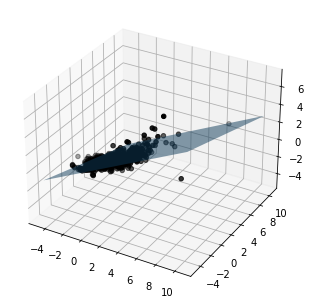

In [68]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
X2d = pca.fit_transform(X_train)

model2d = linear_model.LinearRegression()
model2d.fit(X2d, y_train)

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

ax = Axes3D(plt.figure())
ax.scatter(X2d[:,0], X2d[:,1], y_train, color="black")
x1 = np.array([[X2d.min(), X2d.min()], [X2d.max(), X2d.max()]])
x2 = np.array([[X2d.min(), X2d.max()], [X2d.min(), X2d.max()]])
y = model2d.predict(np.array([
    [X2d.min(), X2d.min(), X2d.max(), X2d.max()], 
    [X2d.min(), X2d.max(), X2d.min(), X2d.max()]]).T
    ).reshape((2,2))
ax.plot_surface(x1, x2, y, alpha=0.5)
plt.show()

In [69]:
from sklearn import metrics

metrics.r2_score(y_test, predicted)

0.6390078393194527

In [70]:
from sklearn import ensemble

model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
predicted = scalerY.inverse_transform(predicted.reshape(-1,1)).reshape(-1)

metrics.r2_score(y_test, predicted)

0.8764852745216243

### Parte 6 - Valutazione

In [71]:
import numpy as np

e = y_test - predicted
round(np.mean(np.abs((e)/predicted)), 2)

0.11

In [72]:
np.mean(abs(e))

19507.633685370376

In [73]:
max(abs(e))

152260.21673490724

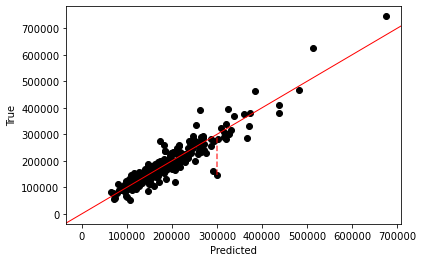

In [74]:
fig, ax = plt.subplots()
ax.scatter(predicted, y_test, color="black")
ax.axline((0,0), slope=1, linewidth=1, color='red')

max_idx = list(abs(e)).index(max(abs(e))) 
max_true = y_test[max_idx]
max_pred = predicted[max_idx]

ax.vlines(x=max_pred, ymin=max_true, 
          ymax=max_true+max(abs(e)), 
          color='red', linestyle='--', alpha=0.7)
ax.set(xlabel="Predicted", ylabel="True")
plt.show()

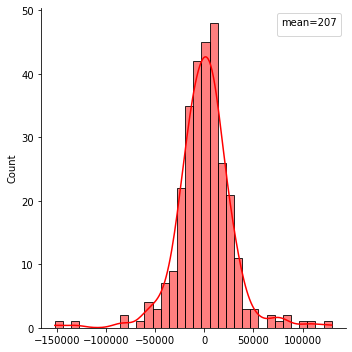

In [75]:
sns.displot(data=e, color="red", kde=True)
plt.legend(title="mean={:,.0f}".format(np.mean(e)), labels=[])
plt.show()

### Parte 7 - Explainability

In [93]:
int(y_test[0])

235000

In [94]:
int(predicted[0])

203330

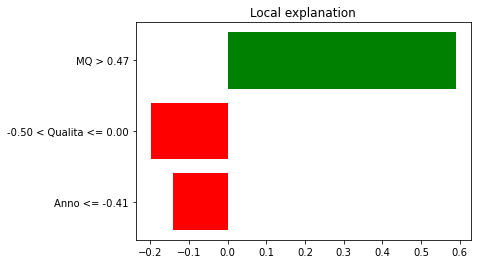

In [96]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
            training_data=X_train, 
            feature_names=X_names, 
            class_names="Y", 
            mode="regression")

explained = explainer.explain_instance(X_test[0], 
                                       model.predict, 
                                       num_features=3)
explained.as_pyplot_figure()
plt.show()

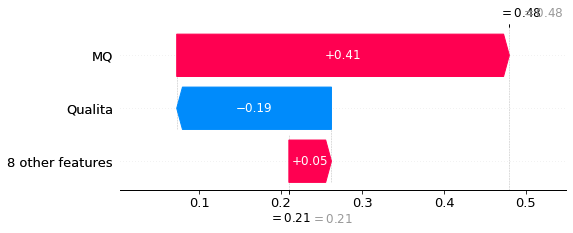

In [97]:
import shap  #==0.35.0

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test[0])
shap.waterfall_plot(explainer.expected_value[0], 
                    shap_values, 
                    feature_names=X_names, 
                    max_display=3)

### Parte 8 - Feature Selection

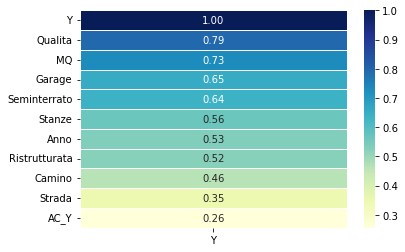

In [103]:
sns.heatmap(
    dtf_train.corr()[["Y"]].sort_values(
        by="Y", ascending=False), 
    annot=True, fmt='.2f', 
    cmap="YlGnBu", linewidths=0.5)
plt.show()

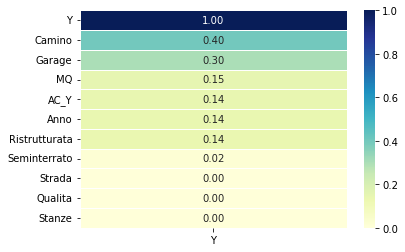

In [104]:
import ppscore

sns.heatmap(
    ppscore.matrix(dtf_train)[["Y"]].sort_values(
        by="Y", ascending=False), 
    annot=True, fmt='.2f', 
    cmap="YlGnBu", linewidths=0.5)
plt.show()

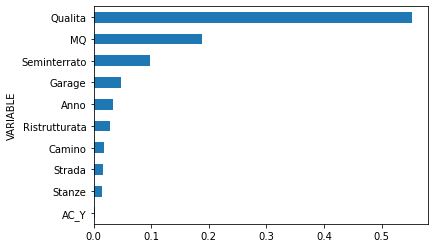

In [106]:
importances = model.feature_importances_

tmp = pd.DataFrame({"IMPORTANCE":importances, 
                    "VARIABLE":X_names}
    ).sort_values("IMPORTANCE", ascending=True)

tmp.set_index("VARIABLE")["IMPORTANCE"].plot(kind="barh")
plt.show()

### Parte 9 - Fine Tuning

In [107]:
?ensemble.GradientBoostingRegressor

Init signature:
ensemble.GradientBoostingRegressor(
    *,
    loss='ls',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    Loss function to be op

In [108]:
param_dic = {
    'learning_rate':[0.15,0.1,0.05,0.01,0.005],
    'n_estimators':[100,250,500,750,1000,1250,1500,1750],  
    'max_depth':[2,3,4,5,6,7],                             
    'min_samples_split':[2,4,6,8,10,20,40,60,100],        
    'min_samples_leaf':[1,3,5,7,9],                        
    'max_features':[2,3,4,5,6,7],           
    'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
}

In [113]:
search = model_selection.RandomizedSearchCV(
            ensemble.GradientBoostingRegressor(),
            param_distributions=param_dic,
            n_iter=10, 
            scoring="r2").fit(X_train, y_train)

best_m = search.best_estimator_
best_m

GradientBoostingRegressor(learning_rate=0.005, max_depth=5, max_features=4,
                          min_samples_leaf=9, min_samples_split=4,
                          n_estimators=1000, subsample=0.8)

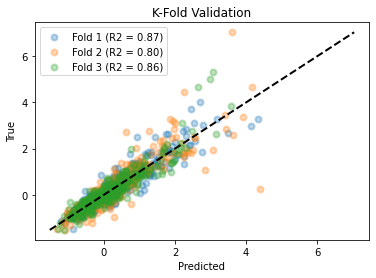

In [112]:
scores = []
cv = model_selection.KFold(n_splits=3)

i = 1
for train, test in cv.split(X_train, y_train):
    prediction = best_m.fit(X_train[train], 
                            y_train[train]
                ).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], 
         [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()